In [1]:
import numpy as np
import pandas as pd
import scipy
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-prediction/heart_attack_prediction_dataset.csv")
df.sample(20)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
4773,HMX5124,70,Male,231,157/76,103,0,0,1,0,...,4.438563,94057,29.386793,410,7,6,France,Europe,Northern Hemisphere,1
8668,CTS3071,36,Male,206,143/88,40,1,0,1,0,...,3.594947,205971,23.818069,751,1,8,Vietnam,Asia,Northern Hemisphere,0
5586,NPK3078,39,Male,303,137/61,110,1,1,1,1,...,6.530982,204086,29.566845,776,2,10,Thailand,Asia,Northern Hemisphere,1
5783,MNF4782,21,Male,239,113/97,44,1,0,1,1,...,10.277086,270787,34.326774,218,5,6,Italy,Europe,Southern Hemisphere,0
8109,DLG4048,66,Male,158,172/91,67,1,0,1,1,...,10.749396,182170,35.100723,423,7,6,Canada,North America,Northern Hemisphere,1
2946,JFS9078,68,Female,207,96/69,95,1,0,1,0,...,10.909208,144448,37.984440,417,5,4,United States,North America,Northern Hemisphere,1
5056,BER4075,63,Male,299,155/88,77,1,1,1,1,...,1.834887,133592,23.559554,765,6,9,Thailand,Asia,Northern Hemisphere,0
6430,URW4656,47,Male,274,100/79,96,1,0,1,1,...,5.862954,57585,26.192877,307,6,5,South Africa,Africa,Southern Hemisphere,0
3785,PFK2090,35,Female,241,101/75,97,1,0,0,0,...,8.052083,155609,36.156123,724,3,7,Italy,Europe,Southern Hemisphere,1
1305,IDT5679,88,Male,392,169/78,68,1,1,1,0,...,0.198437,179072,33.414146,454,7,7,Nigeria,Africa,Northern Hemisphere,0


**Data Vaildation**    
The dataset would confrim that including all patien are from different parts of the world and we could  
increase the use of the model and decrease the chance of the dataset beening bios.      
After Vaildation we could drop those features that related to region  

           Country  Counts
0        Argentina     471
1        Australia     449
2           Brazil     462
3           Canada     440
4            China     436
5         Colombia     429
6           France     446
7          Germany     477
8            India     412
9            Italy     431
10           Japan     433
11     New Zealand     435
12         Nigeria     448
13    South Africa     425
14     South Korea     409
15           Spain     430
16        Thailand     428
17  United Kingdom     457
18   United States     420
19         Vietnam     425


/tmp/ipykernel_18/1044322439.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


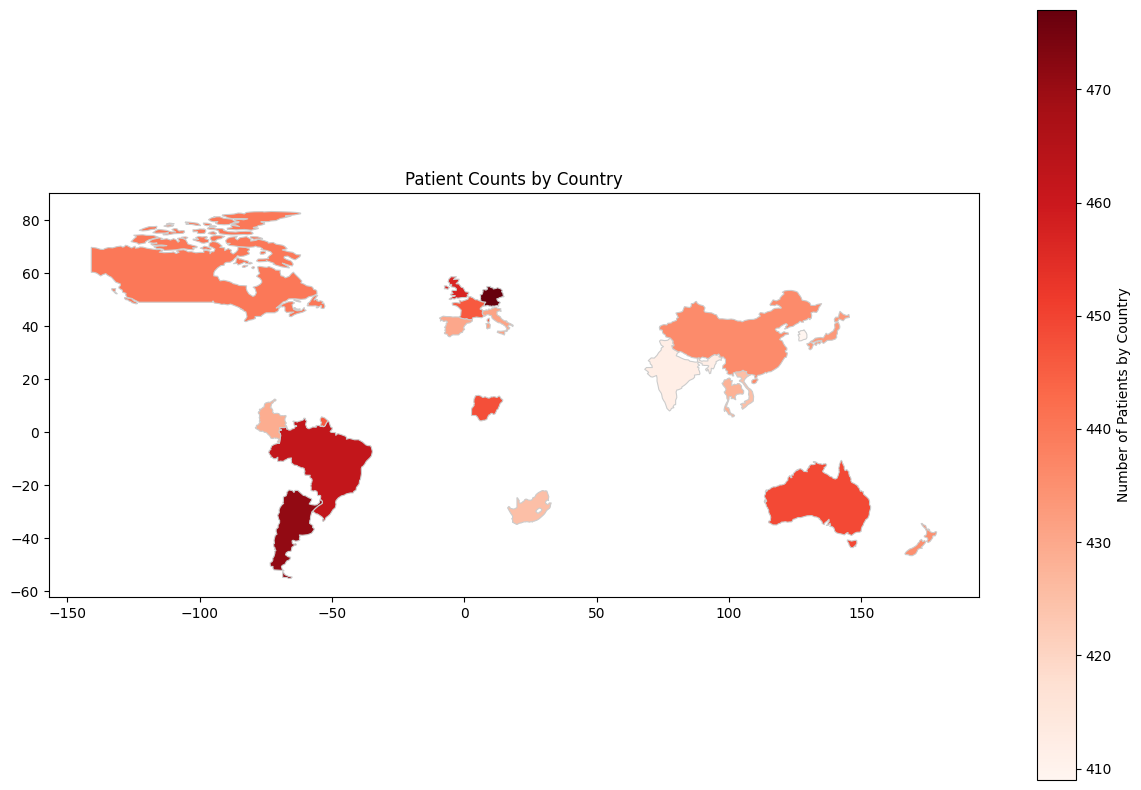

In [3]:
country_counts = df.groupby('Country').size().reset_index(name='Counts')
print(country_counts)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(country_counts, how='left', left_on='name', right_on='Country')


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Counts', ax=ax, cmap='Reds', linewidth=0.8, edgecolor='0.8',
           legend=True, legend_kwds={'label': "Number of Patients by Country"})
ax.set_title('Patient Counts by Country')
plt.show()

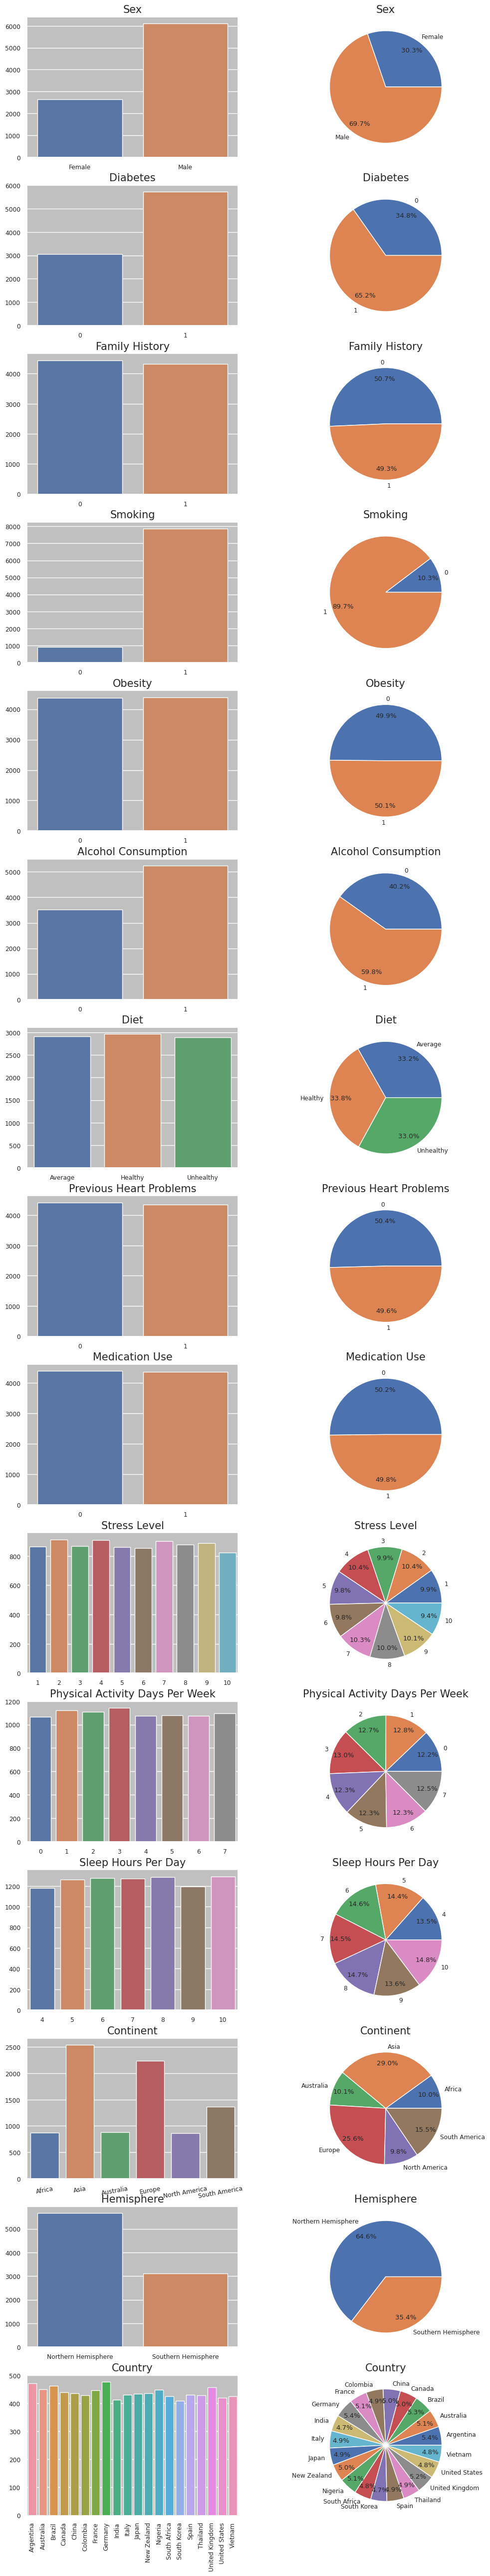

In [4]:
##From: https://www.kaggle.com/code/alhsan/heart-attack-risk-eda-prediction
cat_fea_list = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Physical Activity Days Per Week',
        'Sleep Hours Per Day', 'Continent', 'Hemisphere', 'Country']

plt.figure(figsize=(12,65))
sns.set(rc={'axes.facecolor':'c0c0c0', 'figure.facecolor':'lightblue'}, font_scale=0.8)

i = 0
j = 0
for col in cat_fea_list:
    feature = df.groupby(col)[col].count()
    plt.subplot(15, 2, i+1)
    sns.barplot(x=feature.index, y=feature.values)
    plt.title(col, fontsize=15)
    plt.xlabel("")
    #plt.xlabel(col, fontsize=12, color="#8b1a1a")
    if col == "Country":
        plt.xticks(rotation=90)
    if col == "Continent":
        plt.xticks(rotation=10)
        
    plt.subplot(15, 2, j+2)
    plt.pie(x=feature.values, autopct="%.1f%%", pctdistance=0.8, labels=feature.index)
    plt.title(col, fontsize=15)
    #plt.xlabel(col, fontsize=12, color="#8b1a1a")
    i += 2
    j += 2
plt.show()

**Data Processing and Cleaning**   
Since the dataset in big enough we can drop nan values and duplicate and    
Blood Pressure can be separate into systolic blood pressure and diastolic blood pressure.   
which add another feature into the dataset 

In [5]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'])
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'])

df.drop(columns=['Blood Pressure'], inplace=True)
df.sample(20)

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
2280,GYO5145,37,Male,230,102,1,1,1,1,1,...,32.433807,626,7,10,France,Europe,Northern Hemisphere,1,125,98
7834,PBU1970,20,Male,200,52,1,0,1,0,0,...,25.093519,757,6,7,Germany,Europe,Northern Hemisphere,0,101,85
7008,WFM6960,76,Female,234,55,0,0,1,0,0,...,29.288564,524,1,10,United States,North America,Northern Hemisphere,1,162,98
2172,IUQ2179,46,Male,168,55,1,1,1,0,0,...,24.084552,98,4,9,Germany,Europe,Northern Hemisphere,0,177,87
3879,RDF6503,90,Female,172,74,0,1,1,1,1,...,34.868946,792,3,7,United Kingdom,Europe,Northern Hemisphere,0,91,87
6599,FFB3370,19,Male,267,99,0,0,1,0,1,...,18.057612,700,1,6,Vietnam,Asia,Northern Hemisphere,1,105,76
2888,SJZ2989,40,Female,172,67,0,1,0,1,1,...,21.094200,410,3,9,Nigeria,Africa,Northern Hemisphere,0,120,63
8371,SXA0417,84,Female,159,67,0,0,1,1,1,...,21.345971,488,2,6,Colombia,South America,Northern Hemisphere,0,149,107
5797,ZOA6122,63,Female,305,97,1,1,1,0,0,...,18.518764,387,2,10,South Korea,Asia,Northern Hemisphere,0,98,79
4607,AWW8197,78,Male,152,99,1,1,1,0,1,...,20.095968,281,4,6,Japan,Asia,Northern Hemisphere,0,124,87


In [6]:
df.info()
nan_values = df.isna().sum()
print("NaN: ", nan_values)

duplicated_values = df.duplicated().sum()
print("duplicated: ", duplicated_values)

non_numeric_cols = ['Patient ID', 'Country', 'Continent', 'Hemisphere']
df = df.drop(columns=non_numeric_cols)

##seens like the dataset is already been clean
##and ready for for the next step

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [7]:
df.sample(20)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic BP,Diastolic BP
5723,85,Male,146,40,1,0,1,0,1,15.132469,...,1,8.401223,40046,39.566158,435,7,8,1,166,100
2537,32,Male,238,77,0,1,1,1,1,7.117096,...,6,6.817963,63972,35.432845,242,7,10,1,131,68
6153,46,Female,132,41,1,1,1,0,1,12.256660,...,4,6.587524,267864,36.820277,128,3,4,1,141,70
4163,30,Male,384,62,0,0,1,1,1,17.898810,...,5,9.280709,23950,26.960991,63,4,10,0,128,85
7881,53,Male,205,65,1,0,1,0,0,19.081855,...,4,3.967949,158403,31.491910,54,5,4,0,119,92
7862,39,Male,188,73,0,0,1,0,1,3.908339,...,1,1.398048,186958,32.859423,343,7,5,0,176,75
289,75,Male,155,103,1,1,1,1,1,2.233960,...,6,2.610231,294591,37.548880,788,7,5,1,151,68
1037,82,Female,351,97,0,1,1,1,1,9.825889,...,5,6.399139,261375,19.190619,722,3,6,0,105,63
4426,90,Male,217,50,0,0,1,1,1,2.757762,...,1,9.402923,38296,21.584511,362,6,6,0,113,105
2202,89,Male,135,106,0,0,1,1,1,11.947608,...,2,10.443108,164568,33.187031,486,5,6,0,164,95


Find features that are highly correlated to diabetes to create a Mechine Learning/Deep Learning model    
The model will goes wrong with too much data we have to fliter out all the unnecessary features that will make    
The model have higher rate of good predictions.    

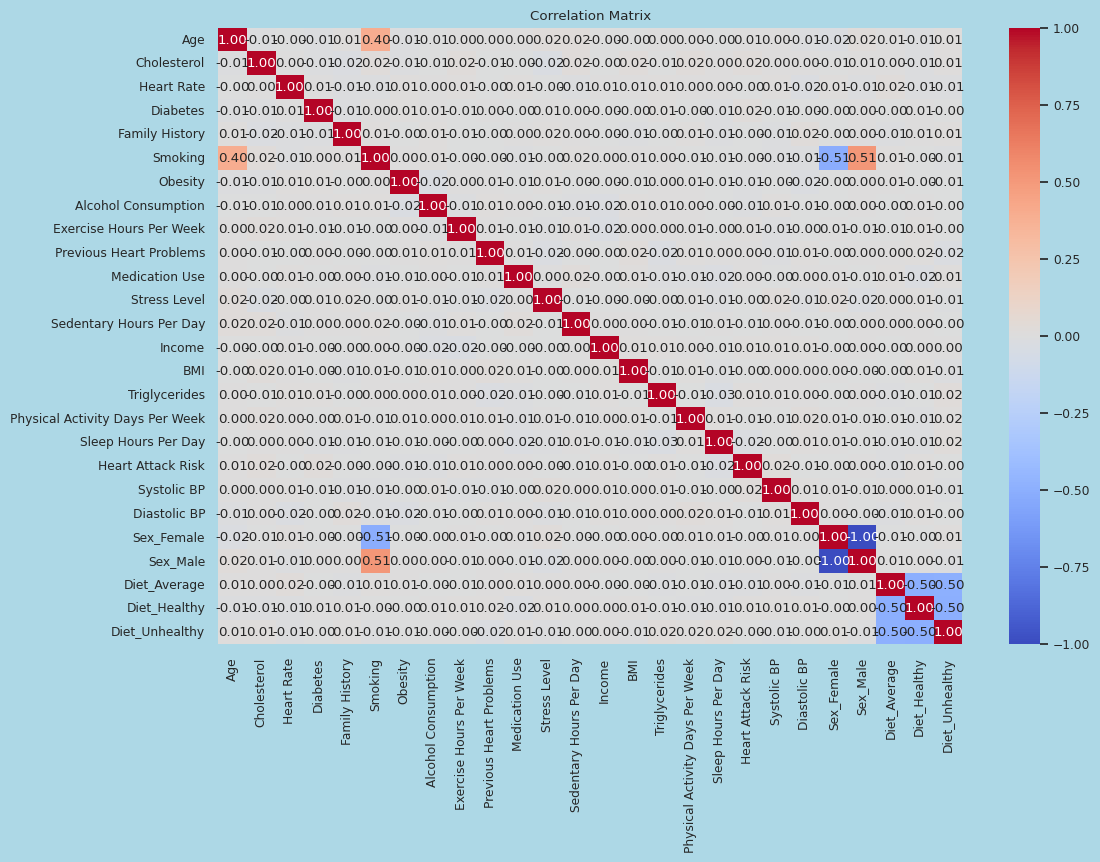

In [8]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Diet'])

corr_matrix = df_encoded.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

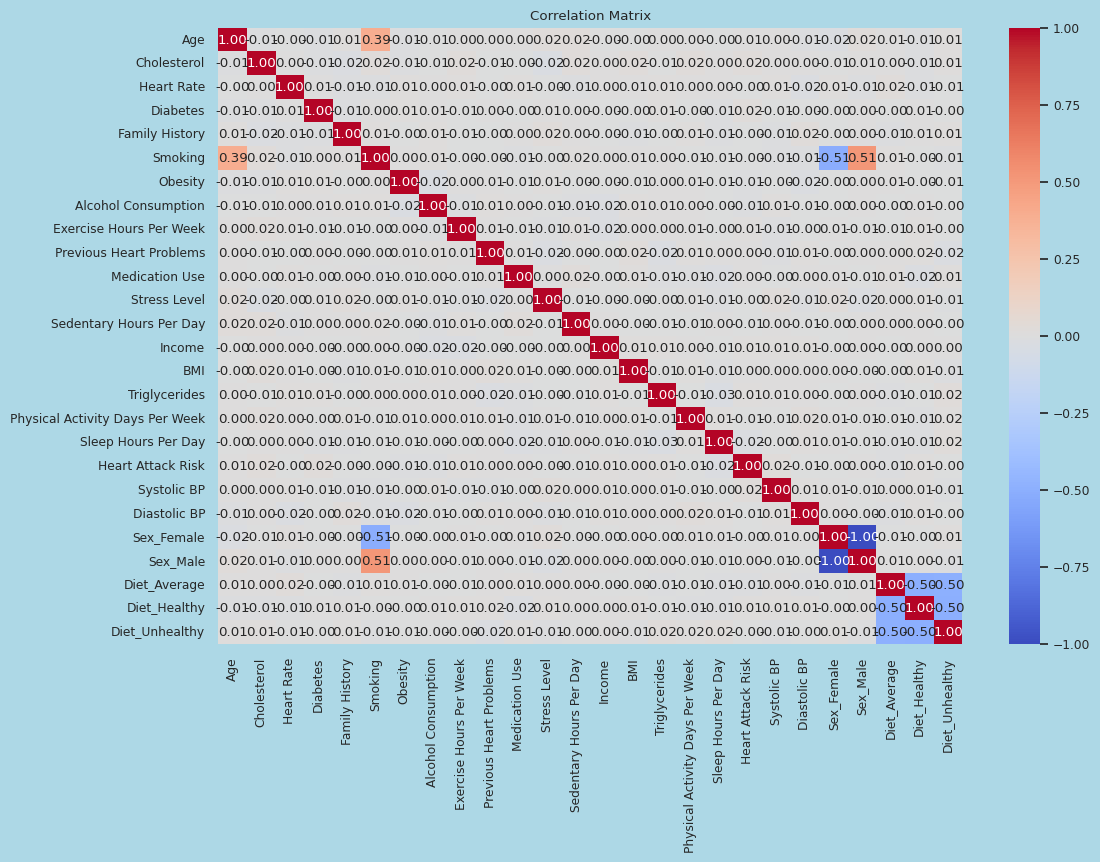

In [9]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Diet'])

corr_matrix = df_encoded.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Based on the corralation no information can be found   
We have to change the strategy by choosing our own features to test

**Plan For the Project**  
1. Research the most correlated feature available online for diabetes.
2. Research the most correlated online feature for a heart attack risk.
3. Build a machine learning model using sklearn for both usage. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [11]:
diabetes_df = df[['Age', 'Diet', 'Obesity', 'Physical Activity Days Per Week','Diabetes',
                  'Stress Level','Sedentary Hours Per Day','Income','Systolic BP', 'Diastolic BP']]
diabetes_df = pd.get_dummies(diabetes_df, columns=['Diet','Obesity'])

In [12]:
X = diabetes_df.drop('Diabetes', axis=1)
y = diabetes_df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [13]:
models = [RandomForestClassifier(), LogisticRegression(), SVC()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'Model Name: {model}')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print('\n')
    

Model Name: RandomForestClassifier()
Accuracy: 0.6240730176839704
Precision: 0.6439440048691418
Recall: 0.9346289752650176
F1 Score: 0.7625225225225225


Model Name: LogisticRegression()
Accuracy: 0.6457501426126641
Precision: 0.6457501426126641
Recall: 1.0
F1 Score: 0.7847487001733103


Model Name: SVC()
Accuracy: 0.6457501426126641
Precision: 0.6457501426126641
Recall: 1.0
F1 Score: 0.7847487001733103




**Heart Attack Risk Model**  

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [15]:
heart_attack_risk_df = df[['Previous Heart Problems', 'Medication Use',
                           'Systolic BP', 'Diastolic BP','Smoking', 'Obesity', 'Cholesterol',
                           'Diet', 'Heart Attack Risk']]

heart_attack_risk_df = pd.get_dummies(heart_attack_risk_df, columns=['Diet','Obesity'])

In [16]:
X = heart_attack_risk_df.drop('Heart Attack Risk', axis=1)
y = heart_attack_risk_df['Heart Attack Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [17]:
models = [
    RandomForestClassifier(class_weight='balanced'),
    LogisticRegression(max_iter=1000),
    SVC()
]

# Track the best model and its performance
best_model = None
best_score = 0

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'Model Name: {model}')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print('\n')
    
    if accuracy > best_score:
        best_score = accuracy
        best_model = model

Model Name: RandomForestClassifier(class_weight='balanced')
Accuracy: 0.6041072447233314
Precision: 0.3626373626373626
Recall: 0.15993537964458804
F1 Score: 0.2219730941704036




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Name: LogisticRegression(max_iter=1000)
Accuracy: 0.6468910439247005
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


Model Name: SVC()
Accuracy: 0.6468910439247005
Precision: 0.0
Recall: 0.0
F1 Score: 0.0




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
with open('best_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)
        print(f'The best model ({best_model}) with accuracy {best_score} has been saved as best_model.pkl')

The best model (LogisticRegression(max_iter=1000)) with accuracy 0.6468910439247005 has been saved as best_model.pkl
